# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#starting weather map for api call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

#list of city data
city_data = []

#print to logger
print("beginning data retrieval")
print("-" * 10)
#create counters
record_count = 1
set_count = 1
#loop through all cities in list
for index, city in enumerate(cities):
    #group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    #create endpoint url with each city
    city_url = url + "&q=" + city
    
    #log the url record and set number
    print(f"Processing Record {record_count} Of Set {set_count} | {city}")
    
    record_count += 1
    
    #run an api count for each of the cities
    try:
        #parse the json and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        #extract max temperature humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_humidity = city_weather["main"]["humidity"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append city info into city data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    except:
        print("City Not Found. Skipping...")
        pass
#indicate that data loading is complete
print("-----------------")
print("Data Retrieval Complete")
print("-----------------")

print("Data Recieved:", city_data)

beginning data retrieval
----------
Processing Record 1 Of Set 1 | talnakh
Processing Record 2 Of Set 1 | new norfolk
Processing Record 3 Of Set 1 | portland
Processing Record 4 Of Set 1 | albany
Processing Record 5 Of Set 1 | amderma
City Not Found. Skipping...
Processing Record 6 Of Set 1 | digby
Processing Record 7 Of Set 1 | cape town
Processing Record 8 Of Set 1 | barentsburg
City Not Found. Skipping...
Processing Record 9 Of Set 1 | potoru
Processing Record 10 Of Set 1 | souillac
Processing Record 11 Of Set 1 | shimoda
Processing Record 12 Of Set 1 | atuona
Processing Record 13 Of Set 1 | qaanaaq
Processing Record 14 Of Set 1 | hobart
Processing Record 15 Of Set 1 | port elizabeth
Processing Record 16 Of Set 1 | puerto ayora
Processing Record 17 Of Set 1 | punta arenas
Processing Record 18 Of Set 1 | mar del plata
Processing Record 19 Of Set 1 | tautira
Processing Record 20 Of Set 1 | kapaa
Processing Record 21 Of Set 1 | payakumbuh
Processing Record 22 Of Set 1 | luganville
Proc

City Not Found. Skipping...
Processing Record 38 Of Set 4 | malamig
Processing Record 39 Of Set 4 | nizwa
Processing Record 40 Of Set 4 | kloulklubed
Processing Record 41 Of Set 4 | muros
Processing Record 42 Of Set 4 | nova odesa
Processing Record 43 Of Set 4 | margate
Processing Record 44 Of Set 4 | una
Processing Record 45 Of Set 4 | kieta
Processing Record 46 Of Set 4 | rio grande
Processing Record 47 Of Set 4 | koboldo
City Not Found. Skipping...
Processing Record 48 Of Set 4 | saskylakh
Processing Record 49 Of Set 4 | utiroa
City Not Found. Skipping...
Processing Record 0 Of Set 5 | georgetown
Processing Record 1 Of Set 5 | bambous virieux
Processing Record 2 Of Set 5 | dingle
Processing Record 3 Of Set 5 | port lincoln
Processing Record 4 Of Set 5 | carnarvon
Processing Record 5 Of Set 5 | hilo
Processing Record 6 Of Set 5 | padang
Processing Record 7 Of Set 5 | yuncheng
Processing Record 8 Of Set 5 | ostrovnoy
Processing Record 9 Of Set 5 | nipawin
Processing Record 10 Of Set 5

Processing Record 24 Of Set 8 | sechura
Processing Record 25 Of Set 8 | sabang
Processing Record 26 Of Set 8 | khani
Processing Record 27 Of Set 8 | bubaque
Processing Record 28 Of Set 8 | nemuro
Processing Record 29 Of Set 8 | sidi ali
Processing Record 30 Of Set 8 | evansville
Processing Record 31 Of Set 8 | llallagua
Processing Record 32 Of Set 8 | qinhuangdao
Processing Record 33 Of Set 8 | sao geraldo do araguaia
Processing Record 34 Of Set 8 | faya
Processing Record 35 Of Set 8 | silvan
Processing Record 36 Of Set 8 | ossora
Processing Record 37 Of Set 8 | dandong
Processing Record 38 Of Set 8 | udachnyy
Processing Record 39 Of Set 8 | carbondale
Processing Record 40 Of Set 8 | fonte boa
Processing Record 41 Of Set 8 | karatau
Processing Record 42 Of Set 8 | aykhal
Processing Record 43 Of Set 8 | zhigansk
Processing Record 44 Of Set 8 | kalmunai
Processing Record 45 Of Set 8 | toora-khem
Processing Record 46 Of Set 8 | fernley
Processing Record 47 Of Set 8 | wewak
Processing Reco

Processing Record 12 Of Set 12 | barra do garcas
Processing Record 13 Of Set 12 | vizinga
Processing Record 14 Of Set 12 | solovetskiy
City Not Found. Skipping...
Processing Record 15 Of Set 12 | marcona
City Not Found. Skipping...
Processing Record 16 Of Set 12 | alvarado
Processing Record 17 Of Set 12 | andros town
Processing Record 18 Of Set 12 | sestri levante
Processing Record 19 Of Set 12 | pedernales
Processing Record 20 Of Set 12 | axim
Processing Record 21 Of Set 12 | ewa beach
Processing Record 22 Of Set 12 | southborough
Processing Record 23 Of Set 12 | samarai
Processing Record 24 Of Set 12 | minas
Processing Record 25 Of Set 12 | palmer
Processing Record 26 Of Set 12 | svetlogorsk
Processing Record 27 Of Set 12 | sindou
Processing Record 28 Of Set 12 | ciudad bolivar
Processing Record 29 Of Set 12 | japura
Processing Record 30 Of Set 12 | doha
Processing Record 31 Of Set 12 | port blair
Processing Record 32 Of Set 12 | poum
Processing Record 33 Of Set 12 | vizimyary
City N

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#convert array of json into pandas

city_data_df = pd.DataFrame(city_data)

#extract relevant fields from dataframe

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#display city dataframe
city_data_df.head()


City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      talnakh  69.4865   88.3972     33.21        98         100        7.25   
1  new norfolk -42.7826  147.0587     63.66        63          82        5.01   
2     portland  45.5234 -122.6762     64.17        57          20        1.01   
3       albany  42.6001  -73.9662     63.21        89          16        2.84   
4        digby  44.6169  -65.7655     53.58        82          32        8.08   

  Country        Date  
0      RU  1633652066  
1      AU  1633652067  
2      US  1633651794  
3      US  1633651583  
4      CA  1633652068

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

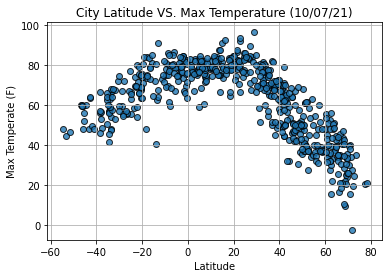

In [9]:
#buld scatter plot for Lat vs. Temp

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title("City Latitude VS. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperate (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("output_data/Fig1.png")

#show plot
plt.show()



## Latitude vs. Humidity Plot

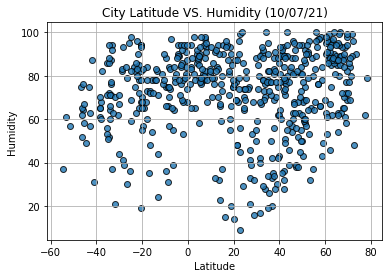

In [10]:
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title("City Latitude VS. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

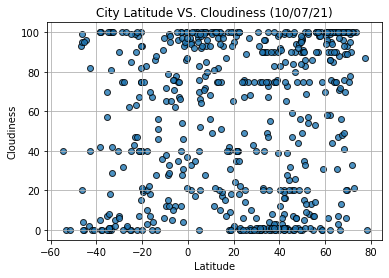

In [11]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title("City Latitude VS. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

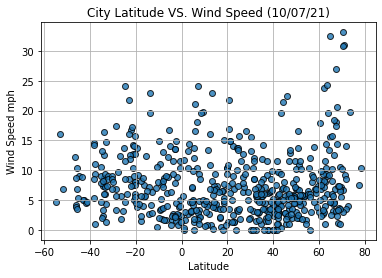

In [12]:
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title("City Latitude VS. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show()

## Linear Regression

In [16]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values, y_values)
    plt.scatter(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is : {rvalue}")
    plt.show()

In [17]:
#create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [1]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))


NameError: name 'northern_hemi_df' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,25))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))